# Muon Separator Voltage Signal Exploration Pre Capacitor

In this notebook, we explore the raw voltage signal. This data was sampled with the frequency at 1000Hz and the number of elements at 100, so the DAQ sent a packet of 100 readings to the IOC every 0.1 seconds. 

The aim is to see how noisy the data is and if there is a 50Hz component. The data was taken before a 0.1uF capacitor was fitted so will be extra noisy. More analysis will be needed of data post fitting the capacitor.

In [1]:
import numpy as np
import altair as alt
import os
import pandas as pd

from src.data_processing import create_data_from_entry, calibrate_data
from src.vizualization import LINE_COLOUR

# Render altair charts correctly
alt.renderers.enable('notebook')

# Store the altair char json separately and not in the notebook to reduce
# notebook size
alt.data_transformers.enable('json')

%load_ext autoreload
%autoreload 2

## Cleaning the data

The raw data takes the following form:

- Column 0: Time since EPOCH the reading was taken given by the python collection script `Muon-data-logger.py`.
- Column 1-100: Data from the `DAQ:_RAW` record. The readings are the DAQ voltage readings. These readings were requested every 0.05 seconds by the `Muon-data-logger.py` python script which collected data from the IOC.

In [2]:
raw = pd.read_csv(os.path.join(os.getcwd(), "..", "data", "raw", "muon_results.csv"), nrows=36000, header=None)

Now we clean the data up by changing the datatime value to a timestamp, drop any rows with duplicate values and then reset the index.

In [3]:
def clean_data(dataframe):
    """
    Sets the columns of the dataframe and removes duplicates

    Args:
        dataframe: Pandas data frame with columns labeled 0-101.
            First column is a datetime EPOCH timestamp and next 100 are voltage readings.

    Returns:
        dataframe: Dataframe with converted columns and duplicates removed.
    """
    dataframe["Datetime"] = pd.to_datetime(dataframe[0], unit="s")
    dataframe = dataframe.drop(0, 1)
    dataframe = dataframe.drop_duplicates(list(range(1, 100 + 1)))
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

data = clean_data(raw)
calibrated_data = calibrate_data(data, 20)
calibrated_data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,90.371049,89.006572,88.368966,87.999155,84.658099,87.297788,86.985361,87.680352,87.457190,89.784452,...,91.671765,92.385884,93.144635,94.674890,93.291285,93.986275,93.661096,93.348669,91.608005,2018-09-21 16:56:48.930999994
1,93.246652,91.888552,90.619716,90.434810,88.745154,87.520950,88.413599,86.175602,86.704815,86.985361,...,88.872675,89.580418,90.479442,91.454979,92.424141,92.022449,93.514447,93.578207,92.819456,2018-09-21 16:56:49.041000128
2,91.486860,90.913014,88.292454,88.930060,88.209565,85.537996,87.285036,86.456148,86.596422,88.171309,...,89.746195,91.620757,92.035201,92.985234,94.387967,93.928891,93.559079,94.215813,91.952312,2018-09-21 16:56:49.367999792
3,89.344504,91.142552,90.804621,92.749320,92.105338,94.222189,93.348669,94.107420,93.565455,92.609046,...,89.905597,89.593170,87.967275,88.062916,85.735654,87.195771,86.035328,86.851464,88.209565,2018-09-21 16:56:49.640000105
4,87.731360,89.452897,91.066040,92.334876,92.570790,95.204103,93.329541,93.960771,93.463438,93.093627,...,90.696228,88.713274,88.171309,88.031035,85.722901,86.857840,86.985361,86.679310,87.565583,2018-09-21 16:56:49.912999868


In [4]:
calibrated_data.tail()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
6880,93.826874,93.782241,93.775865,92.137218,91.410347,90.422058,88.834419,88.879051,87.533703,87.986403,...,86.290371,87.106507,88.126676,88.560248,90.677100,91.505988,91.442227,93.546327,92.978858,2018-09-21 17:29:32.226000071
6881,87.291412,87.438062,86.028952,88.560248,88.706898,90.192520,91.148929,92.704687,92.277491,95.580290,...,94.088292,93.501695,91.735526,92.009697,90.167015,89.076709,88.439103,87.878010,86.022576,2018-09-21 17:29:32.498999834
6882,93.304037,93.756737,93.208396,92.749320,91.971440,91.257322,88.560248,89.076709,87.591087,85.174560,...,87.081002,86.647430,87.406181,88.235069,89.701563,91.792911,91.926808,93.023490,94.687642,2018-09-21 17:29:32.769999981
6883,86.500781,86.915225,86.927977,86.679310,89.051205,89.408264,91.066040,91.780158,92.615422,91.805663,...,94.324206,93.093627,93.846002,90.383801,90.938519,89.771700,89.312623,87.348797,88.362590,2018-09-21 17:29:33.097000122
6884,93.048994,93.712105,92.749320,92.857713,91.244569,91.180809,88.419975,88.655889,87.616591,85.486987,...,86.277619,87.603839,87.336045,89.134094,89.401888,91.920432,91.505988,92.730191,94.853419,2018-09-21 17:29:33.369999886


In [5]:
calibrated_data.to_csv(os.path.join(os.getcwd(), "..", "data", "processed", "pre-capactitor-raw-data.csv"), index=False)

In [6]:
def time_difference(row):
    row["Datetime"]

calibrated_data.shape

(6885, 101)

Lets now look at how the data is spread out.

In [7]:
times = calibrated_data.loc[:, "Datetime"]
differences = [ time2 - time1 for time1, time2 in zip(times[0:-1],times[1:]) ]

pd.Series(differences[:10]).mean()

Timedelta('0 days 00:00:00.267100')

In [8]:
def time_period(data, end, begin=0):
    time_delta = data.loc[end, "Datetime"] - data.loc[begin, "Datetime"]
    return time_delta.seconds

time_period(calibrated_data, len(calibrated_data.index) - 1)

1964

So we have a new data value every 0.2671 seconds spread across 1964 seconds.



## Visualizing the data

First we plot the first element (column 1) of each row againist the time it was collected.

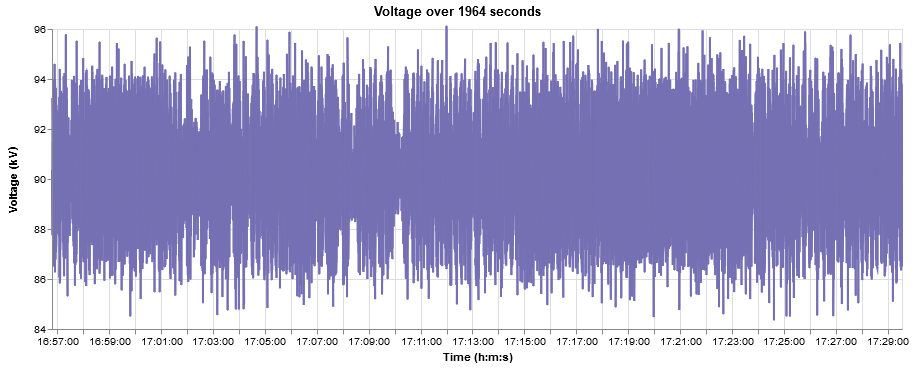

In [13]:
base = alt.Chart().mark_line(color=LINE_COLOUR).encode(
    x = alt.X("Datetime:T", timeUnit="hoursminutesseconds", title="Time (h:m:s)"),
    y = alt.Y("1:Q", title="Voltage (kV)", scale = alt.Scale(domain=[84, 96]))
)

alt.layer(base, data = calibrated_data,
          title="Voltage over {} seconds".format(time_period(calibrated_data, len(calibrated_data.index) - 1)),
          config={"background": "white"},
          width = 850
         )

We now plot 100 elements from the first column of each row againist the time it was collected to see how the voltage behaves over a shorter time period.

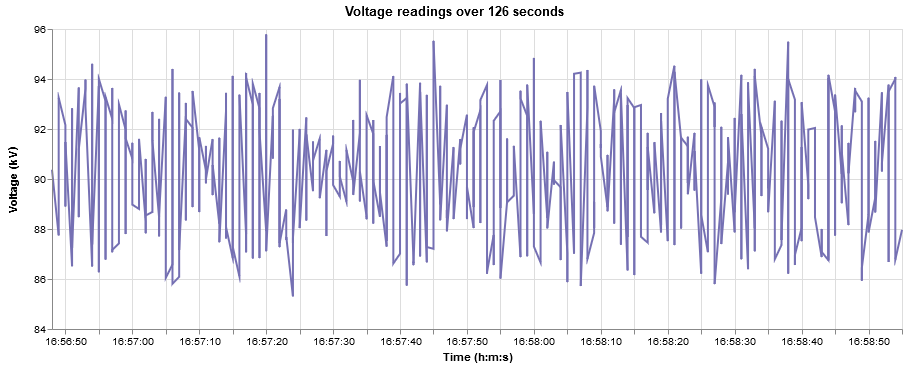

In [14]:
alt.layer(base, data = calibrated_data[:450],
          title="Voltage readings over {} seconds".format(time_period(calibrated_data, 450)),
          config={"background": "white"},
          width = 850
         )

## Conclusion

It looks like the signal has a sine wave but it is hard to see. More anaylsis is required.